# Data

### Imports

In [1]:
import numpy as np
import os
import pickle
from GA.utils import get_avg_fitness, entropy
from GA.algorithm import run_ga
from metrics.lin_reg import get_fitness, get_columns
from visualizers.plotters import plot_evolution

### Load data

In [2]:
import pandas as pd

two_season = pd.read_pickle('data/two_season_df.pickle')
two_season_soccermix_history = pd.read_pickle('data/two_season_df_soccermix_history.pickle')
two_season_soccermix_all = pd.read_pickle('data/two_season_df_soccermix_all.pickle')

In [3]:
target_columns = [
    'player_season_obv_90_next_season',
    'player_season_obv_dribble_carry_90_next_season',
    'player_season_obv_pass_90_next_season',
    'player_season_obv_shot_90_next_season',
    'player_season_obv_defensive_action_90_next_season',

    'player_season_obv_90_increase',
    'player_season_obv_dribble_carry_90_increase',
    'player_season_obv_pass_90_increase',
    'player_season_obv_shot_90_increase',
    'player_season_obv_defensive_action_90_increase'
]

In [4]:
two_season['league_market_value_diff'] = two_season.league_market_value_next_season - two_season.league_market_value
two_season_soccermix_history['league_market_value_diff'] = two_season_soccermix_history.league_market_value_next_season - two_season_soccermix_history.league_market_value
two_season_soccermix_all['league_market_value_diff'] = two_season_soccermix_all.league_market_value_next_season - two_season_soccermix_all.league_market_value

In [5]:
drop_cols = [
    'player_season_ot_shots_faced_ratio',
    'player_season_ot_shots_faced_90',
    'player_season_gsaa_ratio',
    'player_season_np_psxg_faced_90',
    'player_season_goals_faced_90',
    'player_season_clcaa',
    'player_season_gsaa_90',
    'player_season_npot_psxg_faced_90',
    'player_season_da_aggressive_distance',
    'player_season_xs_ratio',
    'league_market_value',
    'league_market_value_next_season',
    'league_market_value_diff'
]
two_season.drop(drop_cols, axis=1, inplace=True)
two_season_soccermix_history.drop(drop_cols, axis=1, inplace=True)
two_season_soccermix_all.drop(drop_cols, axis=1, inplace=True)

### Split dataset into features and targets

In [6]:
two_season_features = two_season.drop(target_columns, axis=1)
two_season_soccermix_history_features = two_season_soccermix_history.drop(target_columns, axis=1)
two_season_soccermix_all_features = two_season_soccermix_all.drop(target_columns, axis=1)

target_sets = dict([(target, two_season[target]) for target in target_columns[:5]])

feature_sets = {
    'two_season': two_season_features,
    'two_season_soccermix_history': two_season_soccermix_history_features,
    'two_season_soccermix_all': two_season_soccermix_all_features,
}

In [ ]:
features_path = 'data/feature_sets.pickle'
targets_path = 'data/target_sets.pickle'

# Create directories if they don't exist
os.makedirs(os.path.dirname(features_path), exist_ok=True)
os.makedirs(os.path.dirname(targets_path), exist_ok=True)

# Save data to file
with open(features_path, 'wb') as file:
    pickle.dump(feature_sets, file)

with open(targets_path, 'wb') as file:
    pickle.dump(target_sets, file)

# Artificial task

### Imports

In [ ]:
# import numpy as np
# from math import sin
# from GA.algorithm import run_ga
# from GA.utils import entropy
# from metrics.lin_reg import get_fitness
# from visualizers.plotters import plot_population_fitness

### Parameters

In [ ]:
# population_size = 50
# generations = 10
# crossover_rate = 0.8
# mutation_rate = 0.1

### Fitness function

In [ ]:
# # return sin fitness, positive fitness (fitness shifted to positive interval) and decimal value
# def fitness_function(bitstring):
#     # get real value of bitstring and scale to fit interval of [0, 128]
#     scaling_factor = 2**(-94)
#     value = int(bitstring, base=2) * scaling_factor
#     fitness = sin(value)
#     return fitness, fitness + 1, value

### SGA

In [ ]:
# entropy_lst_artificial_task_without_crowding = []

# # define custom callback
# def callback(population, generation):
#     entropy_lst_artificial_task_without_crowding.append(entropy(population))
#     plot_population_fitness(population, [0, 128], additional_functions=[np.sin])

        

# print('Running genetic algorithm \n')

# run_ga(population_size, generations, mutation_rate, crossover_rate, fitness_function, crowding=False, epoch_callback=callback)


### With crowding

In [ ]:
# entropy_lst_artificial_task_with_crowding = []


# def callback(population, generation):
#     entropy_lst_artificial_task_with_crowding.append(entropy(population))
#     plot_population_fitness(population, [0, 128], additional_functions=[np.sin])


# print('Running genetic algorithm \n')

# run_ga(population_size, generations, mutation_rate, crossover_rate, fitness_function, crowding=True, epoch_callback=callback)


### Compare crowding vs no crowding

In [ ]:
# from visualizers.plotters import plot_and_compare_evolutions

# plot_and_compare_evolutions(entropy_lst_artificial_task_without_crowding, "SGA", entropy_lst_artificial_task_with_crowding, "Crowding", "Entropy")

# Real task

### Parameters

In [7]:
population_size = 100
generations = 100
crossover_rate = 0.8
mutation_rate = 0.1

MSE without feature selection:  0.006593500095984382
Generation   0  | Population MSE ==>   0.00629549482749778
Generation  10  | Population MSE ==>   0.006108362518515869


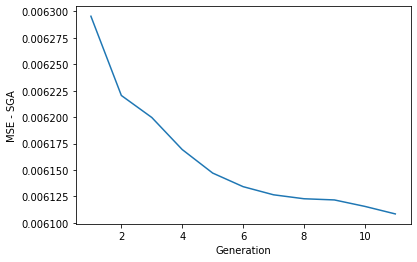

In [9]:
# features = feature_sets['two_season_soccermix_history']
# targets = target_sets['player_season_obv_90_next_season']

# mse_lst = []

# def callback(population, generation):
#     mse = get_avg_fitness(population)
#     mse_lst.append(mse)
#     if generation % 10 == 0:
#         space = " " if generation == 0 else ""
#         print('Generation', space, str(generation) ,' | Population MSE ==>  ', mse)

# def fitness_function(bitstring):
#     columns = get_columns(features, bitstring)
#     mse = get_fitness(columns, targets, n_splits=5)
    
#     # since we want lower rmse to be better
#     positive_fitness = 1 / ((mse**4) * 100)
#     return mse, positive_fitness, None

# # print('MSE without feature selection: ', get_fitness(features, targets)) # print('\nRunning genetic algorithm \n')

# initial_mse = get_fitness(features.to_numpy(), targets.to_numpy(), n_splits=5)
# print('MSE without feature selection: ', initial_mse)

# final_population = run_ga(len(features.columns), population_size, generations, mutation_rate, crossover_rate, fitness_function, epoch_callback=callback)
# final_population.sort(key=lambda x: x.fitness)

# plot_evolution(mse_lst, "MSE - SGA")

### SGA

In [ ]:
# entropy_lst_real_task_without_crowding = []
# rmse_lst_without_crowding = []
results = {}
counter = 0

for target_key in target_sets.keys():
    results[target_key] = {}
    for feature_key in feature_sets.keys():

        features = feature_sets[feature_key]
        targets = target_sets[target_key]

        def fitness_function(bitstring):
            columns = get_columns(features, bitstring)
            mse = get_fitness(columns, targets,  n_splits=5)
            
            # since we want lower rmse to be better
            positive_fitness = 1 / ((mse**4) * 100)
            return mse, positive_fitness, None

        # print('MSE without feature selection: ', get_fitness(features, targets))# print('\nRunning genetic algorithm \n')

        initial_mse = get_fitness(features.to_numpy(), targets.to_numpy(), n_splits=5)        

        final_population = run_ga(len(features.columns), population_size, generations, mutation_rate, crossover_rate, fitness_function) # , epoch_callback=callback)
        final_population.sort(key=lambda x: x.fitness)

        result = {
            'final_bitstring': final_population[0].genotype,
            'initial_mse:': initial_mse,
            'final_mse': final_population[0].fitness,
        }

        results[target_key][feature_key] = result

        print(counter)
        counter += 1

# plot_evolution(rmse_lst_without_crowding, "MSE - SGA")

In [ ]:
results_dict_path = 'data/results_dict.pickle'

# Create directories if they don't exist
os.makedirs(os.path.dirname(results_dict_path), exist_ok=True)

# Save data to file
with open(results_dict_path, 'wb') as file:
    pickle.dump(results, file)

### With crowding

In [ ]:
# entropy_lst_real_task_with_crowding = []
# rmse_lst_with_crowding = []

# # define custom callback
# def callback(population, generation):
#     entropy_lst_real_task_with_crowding.append(entropy(population))
#     rmse = get_avg_fitness(population)
#     rmse_lst_with_crowding.append(rmse)
#     if generation % 10 == 0:
#         space = " " if generation == 0 else ""
#         print('Generation', space, str(generation) ,' | Population MSE ==>  ', rmse)

        

# print('MSE without feature selection: ', get_fitness(data, targets))

# print('\nRunning genetic algorithm \n')

# final_population = run_ga(population_size, generations, mutation_rate, crossover_rate, fitness_function, crowding=True, epoch_callback=callback)

# plot_evolution(rmse_lst_with_crowding, "MSE - Crowding")

### Compare crowding vs no crowding

In [ ]:
# from visualizers.plotters import plot_and_compare_evolutions

# plot_and_compare_evolutions(rmse_lst_without_crowding, "SGA", rmse_lst_with_crowding, "Crowding", "RMSE")
# plot_and_compare_evolutions(entropy_lst_real_task_without_crowding, "SGA", entropy_lst_real_task_with_crowding, "Crowding", "Entropy")